<a href="https://colab.research.google.com/github/MANOJ21K/NLP/blob/main/NN_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#for cpu
#!pip install --upgrade tensorflow

In [ ]:
#for gpu
#!pip install tensorflow-gpu==2.8.0

In [ ]:
#shows whether you have GPU in device or not
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10201142188876614377
xla_global_id: -1
]


In [ ]:
#from keras.utils import np_utils
from keras.datasets import boston_housing
import seaborn as sns
from keras.initializers import RandomNormal

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time

def plt_dynamic(x, vy, ty, ax, colors=['b']):
  ax.plot(x, vy, 'b', label='Validation Loss')
  ax.plot(x, ty, 'r', label='Train Loss')
  plt.legend()
  plt.grid()
  fig.canvas.draw()

In [ ]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [ ]:
X_train.shape

(404, 13)

In [ ]:
X_train[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [ ]:
y_train[0]

15.2

In [ ]:
#step1
input_dim = X_train.shape[1]
output_dim = 1

batch_size = 128
nb_epoch = 20

In [ ]:
#step2
from tensorflow.keras.models import Sequential
model = Sequential()

In [ ]:
#step3
from keras.layers import Activation, Dense
model.add(Dense(output_dim, input_dim=input_dim, activation='linear'))

In [ ]:
#step4
from tensorflow.keras.metrics import MeanAbsoluteError
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[MeanAbsoluteError()])

In [ ]:
#step5
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, y_test))

Epoch 1/20
4/4 [==============================] - 1s 85ms/step - loss: 206816.2188 - mean_absolute_error: 448.2793 - val_loss: 213867.1406 - val_mean_absolute_error: 454.6861
Epoch 2/20
4/4 [==============================] - 0s 23ms/step - loss: 203472.4375 - mean_absolute_error: 444.6489 - val_loss: 210391.1562 - val_mean_absolute_error: 450.9901
Epoch 3/20
4/4 [==============================] - 0s 17ms/step - loss: 200155.3438 - mean_absolute_error: 441.0268 - val_loss: 206960.0000 - val_mean_absolute_error: 447.3116
Epoch 4/20
4/4 [==============================] - 0s 23ms/step - loss: 196896.7969 - mean_absolute_error: 437.4281 - val_loss: 203568.5938 - val_mean_absolute_error: 443.6453
Epoch 5/20
4/4 [==============================] - 0s 24ms/step - loss: 193657.4219 - mean_absolute_error: 433.8282 - val_loss: 200208.5312 - val_mean_absolute_error: 439.9821
Epoch 6/20
4/4 [==============================] - 0s 22ms/step - loss: 190468.1562 - mean_absolute_error: 430.2398 - val_loss

Test score: 154049.828125
Test MAE: 386.15277099609375


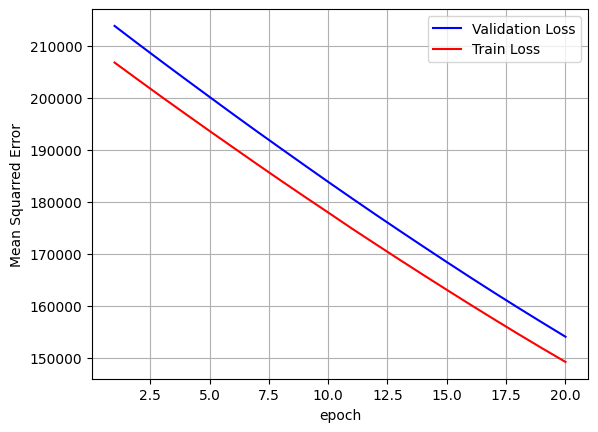

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test MAE:', score[1])

fig, ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Mean Squarred Error')

x = list(range(1, nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [ ]:
score

[154049.828125, 386.15277099609375]

In [ ]:
#in the step3 earlier we build a simple NN, now will build the multilayer perceptron

#step3
model2 = Sequential()
model2.add(Dense(512, activation='linear', input_shape=(input_dim, )))
model2.add(Dense(128, activation='linear'))
model2.add(Dense(output_dim, activation='linear'))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               7168      
                                                                 
 dense_4 (Dense)             (None, 128)               65664     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 72961 (285.00 KB)
Trainable params: 72961 (285.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model2.compile(optimizer='adam', loss='mean_squared_error', metrics=[MeanAbsoluteError()])

In [ ]:
history = model2.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, y_test))

Epoch 1/20
4/4 [==============================] - 1s 64ms/step - loss: 13158.0264 - mean_absolute_error: 109.3828 - val_loss: 4404.0713 - val_mean_absolute_error: 63.9795
Epoch 2/20
4/4 [==============================] - 0s 19ms/step - loss: 6048.4429 - mean_absolute_error: 72.9870 - val_loss: 1389.7047 - val_mean_absolute_error: 35.5200
Epoch 3/20
4/4 [==============================] - 0s 14ms/step - loss: 3237.7617 - mean_absolute_error: 53.6376 - val_loss: 181.0674 - val_mean_absolute_error: 10.5182
Epoch 4/20
4/4 [==============================] - 0s 15ms/step - loss: 1329.6042 - mean_absolute_error: 29.0817 - val_loss: 837.0201 - val_mean_absolute_error: 25.6773
Epoch 5/20
4/4 [==============================] - 0s 15ms/step - loss: 581.4220 - mean_absolute_error: 19.8472 - val_loss: 1479.0378 - val_mean_absolute_error: 35.4875
Epoch 6/20
4/4 [==============================] - 0s 15ms/step - loss: 690.0846 - mean_absolute_error: 20.3632 - val_loss: 929.0559 - val_mean_absolute_erro

Test score: 96.26036834716797
Test MAE: 7.891966342926025


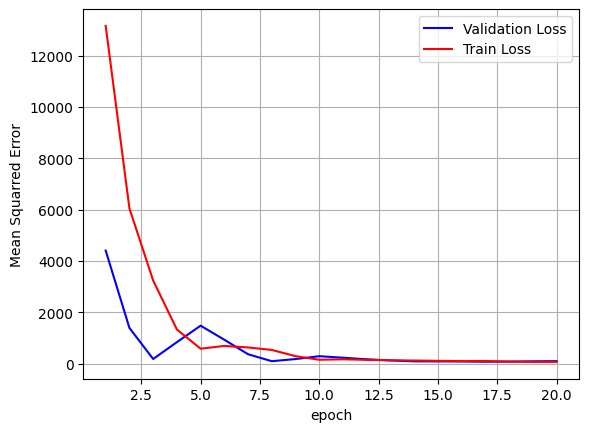

In [ ]:
score = model2.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test MAE:', score[1])

fig, ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Mean Squarred Error')

x = list(range(1, nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

**Using RNN**

In [ ]:
X_test.shape

(102, 13)

In [ ]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

model3 = Sequential()
model3.add(SimpleRNN(512, input_shape=(13, 1), return_sequences=False))
model3.add(Dense(128, activation='linear'))
model3.add(Dense(output_dim, activation='linear'))

model3.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
model3.summary()

history = model3.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, y_test))

score = model3.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test MAE:', score[1])

fig, ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Mean Squarred Error')

x = list(range(1, nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

Epoch 1/20
4/4 [==============================] - 2s 155ms/step - loss: 270.7462 - mean_absolute_error: 12.8764 - val_loss: 106.5381 - val_mean_absolute_error: 9.0278
Epoch 2/20
4/4 [==============================] - 0s 64ms/step - loss: 98.7671 - mean_absolute_error: 8.6953 - val_loss: 66.0189 - val_mean_absolute_error: 5.6720
Epoch 3/20
4/4 [==============================] - 0s 83ms/step - loss: 72.0051 - mean_absolute_error: 5.6031 - val_loss: 72.7466 - val_mean_absolute_error: 5.8063
Epoch 4/20
4/4 [==============================] - 0s 70ms/step - loss: 63.3678 - mean_absolute_error: 5.0923 - val_loss: 53.2411 - val_mean_absolute_error: 5.5806
Epoch 5/20
4/4 [==============================] - 0s 66ms/step - loss: 52.7349 - mean_absolute_error: 5.5542 - val_loss: 44.7966 - val_mean_absolute_error: 4.7505
Epoch 6/20
4/4 [==============================] - 0s 71ms/step - loss: 43.9199 - mean_absolute_error: 4.5128 - val_loss: 40.1088 - val_mean_absolute_error: 4.2858
Epoch 7/20
4/4 [==

**Using LSTM**

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 512)               1052672   
                                                                 
 dense_8 (Dense)             (None, 128)               65664     
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1118465 (4.27 MB)
Trainable params: 1118465 (4.27 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
4/4 [==============================] - 5s 723ms/step - loss: 390.9461 - mean_absolute_error: 17.1175 - val_loss: 111.2041 - val_mean_absolute_error: 7.8649
Epoch 2/20
4/4 [==============================] - 2s 415ms/step - loss: 108.5420 - mean_absolute_error: 7.9483 - 

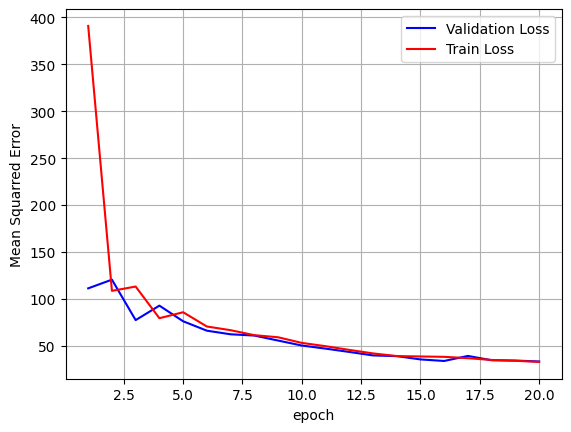

In [ ]:
from keras.models import Sequential
from keras.layers import SimpleRNN,LSTM, Dense

model4 = Sequential()
model4.add(LSTM(512, input_shape=(13, 1), return_sequences=False))
model4.add(Dense(128, activation='linear'))
model4.add(Dense(output_dim, activation='linear'))

model4.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
model4.summary()

history = model4.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, y_test))

score = model4.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test MAE:', score[1])

fig, ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Mean Squarred Error')

x = list(range(1, nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)